In [1]:
import getEPH
import functionsForModels
import make_dummy
import schoolYears
import categorize
import functionsForModels
import createVariables

import pandas as pd
#http://statsmodels.sourceforge.net/devel/examples/generated/example_wls.html
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
np.random.seed(1024)
%matplotlib inline

/home/pipe/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
getEPH.getEPHdbf('t310')

In [4]:
hog = pd.read_csv('data/cleanDataHouseholdt310.csv')

In [5]:
hog.head()

,CODUSU,NRO_HOGAR,REGION,PONDERA,HomeType,HomeTypeesp,RoomsNumber,FloorMaterial,FloorMaterialesp,RoofMaterial,...,DomesticService3,DomesticService4,DomesticService5,DomesticService6,TotalFamilyIncome,TotalFamilyIncomeDec,TotalFamilyIncomeDecReg,PerCapInc,PerCapIncDec,PerCapIncDecReg
0,302468,1,1,1287,2,NaN,2,1,NaN,9,...,2,0,0,0,4000.0,6,6,2000.0,8,8
1,307861,1,1,1674,2,NaN,2,1,NaN,1,...,98,0,0,0,5800.0,8,8,1450.0,6,6
2,308762,1,1,1522,2,NaN,4,1,NaN,9,...,98,0,0,0,3200.0,5,5,3200.0,9,9
3,308278,1,1,1320,2,NaN,3,1,NaN,9,...,96,0,0,0,10000.0,10,10,5000.0,10,10
4,311937,1,1,1281,2,NaN,4,1,NaN,1,...,96,0,0,0,11000.0,10,10,2750.0,9,9


**HomeType IV 1, ** NO CREO QUE SIRVA
Tipo de vivienda ( por observación)
1. = Casa
2. = Departamento
3. = Pieza de inquilinato
4. = Pieza en hotel / pensión
5. = Local no construido para habitación
6. = Otros

**FloorMaterial** SIRVE SACAR TAL COMO ESTA SACAR 9 SE PUEDE HACER PCA CON LAS DE ABAJO
IV3 N(1) Los pisos interiores son principalmente de...
1. = Mosaico / baldosa / madera / cerámica / alfombra
2. = Cemento / ladrillo fijo
3. = Ladrillo suelto / tierra
4. = Otro


** RoofMaterial** SIRVE SACAR TAL COMO ESTA SACAR 9
IV4 N(2) La cubierta exterior del techo es de....
1. = Membrana / cubierta asfáltica
2. = Baldosa / losa sin cubierta
3. = Pizarra / teja
4. = Chapa de metal sin cubierta
5. = Chapa de fibrocemento / plástico
6. = Chapa de cartón
7. = Caña / tabla / paja con barro / paja sola
9. = N/S. Depto en propiedad horizontal

**RoofCoat**
IV5 N(1) ¿El techo tiene cielorraso / revestimiento interior?
1 = Sí
2 = No
    
**Water**
IV6 N(1) Tiene agua...
1. Por cañería dentro de la vivienda
2. Fuera de la vivienda pero dentro del terreno
3. Fuera del terreno

**WaterType**
IV7 N(1) El agua es de...
1. = Red pública (agua corriente)
2. = Perforación con bomba a motor
3. = Perforación con bomba manual
4. = Otra fuente

***'Toilet',***
IV8 N(1) ¿Tiene baño / letrina?
1. = Sí
2. = No

***'ToiletLocation'***

**'ToiletType',**

'IV11',            =            'Sewer',
'IV12_1',          =            'DumpSites',
'IV12_2',          =            'Flooding',
'IV12_3',          =            'EmergencyLoc',
'II1',         =            'UsableTotalRooms',
'II2',         =            'SleepingRooms', #esta es para hacinamiento
'II3',         =            'OfficeRooms',
'II3_1',           =            'OnlyWork',
'II4_1',           =            'Kitchen',
'II4_2',           =            'Sink',
'II4_3',           =            'Garage',
'II7',         =            'Ownership', #JUNTAR 1 Y 3 EN SITUACION CONTACTUAL ESTABLE
'II7_ESP',         =            'Ownershipesp',
'II8',         =           'CookingCombustible',
'II8_ESP',         =            'CookingCombustibleesp'
'II9',         =           'BathroomUse',
'V1',          =            'Working',

In [6]:
def remove9(df,variables):
    for var in variables:
        df[var].replace(to_replace=[9], value=[np.nan] , inplace=True, axis=None)

def remove0(df,variables):
    for var in variables:
        df[var].replace(to_replace=[0], value=[np.nan] , inplace=True, axis=None)

def remove99(df,variables):
    for var in variables:
        df[var].replace(to_replace=[99], value=[np.nan] , inplace=True, axis=None)

In [7]:
hog2 = hog.copy()

Limpieza de valores que estan mal 99, 9 y 0 cuando no corresponde

In [8]:
remove9(df = hog2, variables = ['FloorMaterial','RoofMaterial','RoofCoat','Water','WaterType','Toilet','ToiletLocation',
                               'ToiletType','Sewer','DumpSites','Flooding','EmergencyLoc','CookingCombustible',
                               'BathroomUse'])
remove0(df = hog2, variables = ['FloorMaterial','RoofMaterial','RoofCoat','Water','WaterType','Toilet','ToiletLocation',
                               'ToiletType','Sewer','DumpSites','Flooding','EmergencyLoc','Ownership','CookingCombustible',
                               'BathroomUse'])
remove99(df = hog2, variables = ['Ownership'])

1    1689
2     994
3      13
6       4
4       2
5       1
Name: HomeType, dtype: int64


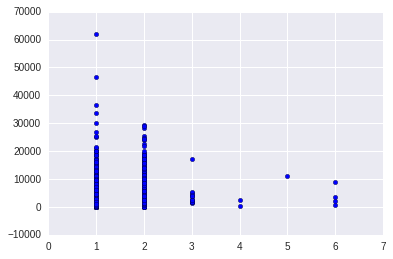

In [9]:
variables = ['HomeType']
for var in variables:
    print hog2[var].value_counts()
    plt.scatter(hog2[var], hog2.TotalHouseHoldIncome)
    plt.show()

Recategorizacion de variables para que tengan mas sentido

In [10]:
#hogFinal = hog2.copy().loc[:,['FloorMaterial','RoofMaterial','RoofCoat','Water','WaterType','Toilet','ToiletLocation',
#                              'ToiletType','Sewer']]

#solamente las que tienen 1. Por cañería dentro de la vivienda
hog2['WaterRec'] = (hog2.Water == 1).astype(int)
hog2['OwnershipRec'] = ((hog2.Ownership == 1) | (hog2.Ownership == 3)).astype(int)
hog2['Hacinamiento'] = hog2.HouseMembers * 1.0 / hog2.SleepingRooms
hog2['id'] =  (hog2.CODUSU.astype(str) + hog2.NRO_HOGAR.astype(str))

#saco los ingresos del hogar
hog2['TotalHouseHoldIncome'].replace(to_replace=[0], value=[1] , inplace=True, axis=None)
hog2['lnHouseIncome'] = np.log(hog2['TotalHouseHoldIncome'])


In [11]:
sinCuartosParaDormir = (hog2.SleepingRooms == 0)
sum(sinCuartosParaDormir)

28

In [12]:
hog2.loc[sinCuartosParaDormir,:].head()

,CODUSU,NRO_HOGAR,REGION,PONDERA,HomeType,HomeTypeesp,RoomsNumber,FloorMaterial,FloorMaterialesp,RoofMaterial,...,TotalFamilyIncomeDec,TotalFamilyIncomeDecReg,PerCapInc,PerCapIncDec,PerCapIncDecReg,WaterRec,OwnershipRec,Hacinamiento,id,lnHouseIncome
10,259897,2,1,1259,2,NaN,5,1.0,NaN,NaN,...,0,0,0.0,0,0,1,0,inf,2598972,0.000000
11,285841,2,1,1311,2,NaN,99,1.0,NaN,NaN,...,3,2,1800.0,7,7,1,0,inf,2858412,7.495542
20,311871,2,1,1374,2,NaN,3,1.0,NaN,NaN,...,2,2,1500.0,7,6,1,0,inf,3118712,7.313220
28,146462,2,1,1457,1,NaN,5,1.0,NaN,2.0,...,4,4,2460.0,9,8,1,0,inf,1464622,7.807917
34,301199,2,1,2168,2,NaN,5,1.0,NaN,NaN,...,2,2,1600.0,7,7,1,0,inf,3011992,7.377759


In [13]:
hog2.head()

,CODUSU,NRO_HOGAR,REGION,PONDERA,HomeType,HomeTypeesp,RoomsNumber,FloorMaterial,FloorMaterialesp,RoofMaterial,...,TotalFamilyIncomeDec,TotalFamilyIncomeDecReg,PerCapInc,PerCapIncDec,PerCapIncDecReg,WaterRec,OwnershipRec,Hacinamiento,id,lnHouseIncome
0,302468,1,1,1287,2,NaN,2,1.0,NaN,NaN,...,6,6,2000.0,8,8,1,1,2.000000,3024681,8.294050
1,307861,1,1,1674,2,NaN,2,1.0,NaN,1.0,...,8,8,1450.0,6,6,1,0,2.000000,3078611,8.665613
2,308762,1,1,1522,2,NaN,4,1.0,NaN,NaN,...,5,5,3200.0,9,9,1,1,1.000000,3087621,8.070906
3,308278,1,1,1320,2,NaN,3,1.0,NaN,NaN,...,10,10,5000.0,10,10,1,1,2.000000,3082781,9.210340
4,311937,1,1,1281,2,NaN,4,1.0,NaN,1.0,...,10,10,2750.0,9,9,1,1,1.333333,3119371,9.305651


In [14]:
hog2.columns

Index([u'CODUSU', u'NRO_HOGAR', u'REGION', u'PONDERA', u'HomeType',
       u'HomeTypeesp', u'RoomsNumber', u'FloorMaterial', u'FloorMaterialesp',
       u'RoofMaterial', u'RoofCoat', u'Water', u'WaterType', u'WaterTypeesp',
       u'Toilet', u'ToiletLocation', u'ToiletType', u'Sewer', u'DumpSites',
       u'Flooding', u'EmergencyLoc', u'UsableTotalRooms', u'SleepingRooms',
       u'OfficeRooms', u'OnlyWork', u'Kitchen', u'Sink', u'Garage',
       u'Ownership', u'Ownershipesp', u'CookingCombustible',
       u'CookingCombustibleesp', u'BathroomUse', u'Working', u'HouseMembers',
       u'Memberless10', u'Membermore10', u'TotalHouseHoldIncome',
       u'DomesticService1', u'DomesticService2', u'DomesticService3',
       u'DomesticService4', u'DomesticService5', u'DomesticService6',
       u'TotalFamilyIncome', u'TotalFamilyIncomeDec',
       u'TotalFamilyIncomeDecReg', u'PerCapInc', u'PerCapIncDec',
       u'PerCapIncDecReg', u'WaterRec', u'OwnershipRec', u'Hacinamiento',
       u'id', u'l

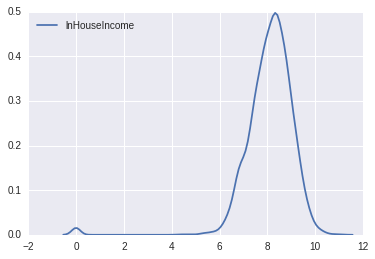

In [15]:
sns.kdeplot(hog2.lnHouseIncome)

In [16]:
hogReducida = hog2.copy().drop(['CODUSU','NRO_HOGAR','REGION','HomeTypeesp','FloorMaterialesp',
                              'WaterTypeesp','Ownershipesp','CookingCombustibleesp','DomesticService1', 
                               'DomesticService2', 'DomesticService3','DomesticService4', 'DomesticService5',
                               'DomesticService6'],axis = 1)

In [17]:
hogReducida.head()

,PONDERA,HomeType,RoomsNumber,FloorMaterial,RoofMaterial,RoofCoat,Water,WaterType,Toilet,ToiletLocation,...,TotalFamilyIncomeDec,TotalFamilyIncomeDecReg,PerCapInc,PerCapIncDec,PerCapIncDecReg,WaterRec,OwnershipRec,Hacinamiento,id,lnHouseIncome
0,1287,2,2,1.0,NaN,1.0,1.0,1,1,1.0,...,6,6,2000.0,8,8,1,1,2.000000,3024681,8.294050
1,1674,2,2,1.0,1.0,1.0,1.0,1,1,1.0,...,8,8,1450.0,6,6,1,0,2.000000,3078611,8.665613
2,1522,2,4,1.0,NaN,1.0,1.0,1,1,1.0,...,5,5,3200.0,9,9,1,1,1.000000,3087621,8.070906
3,1320,2,3,1.0,NaN,1.0,1.0,1,1,1.0,...,10,10,5000.0,10,10,1,1,2.000000,3082781,9.210340
4,1281,2,4,1.0,1.0,1.0,1.0,1,1,1.0,...,10,10,2750.0,9,9,1,1,1.333333,3119371,9.305651


# Indivitual Data

In [18]:
#para leer en otro archivo

ind = pd.read_csv('data/pivotInd.csv', names = ['id','headAge','spouseAge','headAge2','spouseAge2',
                                                  'headFemale','spouseFemale','headEduc','spouseEduc',
                                                  'headEduc2','spouseEduc2','headPrimary','spousePrimary',
                                                  'headSecondary','spouseSecondary','headUniversity','spouseUniversity',
                                                  'headP21','spouseP21','headP47T','spouseP47T',
                                                  'headLnIncome','spouseLnIncome','headLnIncomeT','spouseLnIncomeT',
                                                  'headPredictedLnIncome','spousePredictedLnIncome','headJob','spouseJob',
                                                  'headDECCFR','spouseDECCFR','headDECIFR','spouseDECIFR',
                                                  'headMaritalStatus','spouseMaritalStatus',
                                                  'headReading','spouseReading','headPlaceOfBirth','spouseplaceOfBirth',
                                                 ],skiprows = 3)

ind['id'] = ind['id'].astype(str)


In [19]:
ind.head()

,id,headAge,spouseAge,headAge2,spouseAge2,headFemale,spouseFemale,headEduc,spouseEduc,headEduc2,...,headDECCFR,spouseDECCFR,headDECIFR,spouseDECIFR,headMaritalStatus,spouseMaritalStatus,headReading,spouseReading,headPlaceOfBirth,spouseplaceOfBirth
0,1250971,57.0,NaN,3249.0,NaN,1.0,NaN,14.0,NaN,196.0,...,8.0,NaN,4.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1,1253451,66.0,NaN,4356.0,NaN,1.0,NaN,7.0,NaN,49.0,...,8.0,NaN,3.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,1254461,79.0,NaN,6241.0,NaN,1.0,NaN,12.0,NaN,144.0,...,7.0,NaN,4.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
3,1256691,61.0,NaN,3721.0,NaN,0.0,NaN,7.0,NaN,49.0,...,8.0,NaN,4.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
4,1256892,31.0,23.0,961.0,529.0,0.0,1.0,12.0,12.0,144.0,...,5.0,5.0,1.0,1.0,1.0,1.0,4.0,4.0,NaN,NaN


In [20]:
#sumo los valores predecidos del modelo
ind['sumPredicted'] = ind.headPredictedLnIncome + ind.spousePredictedLnIncome

# Merge de datos

In [21]:
#sacar los hogares sin cuartos para dormir
hogReducida = hogReducida.copy().loc[~sinCuartosParaDormir,:]

In [22]:
#chequeo
print 'filas hog:',hogReducida.shape[0]
print 'filas ind:',ind.shape[0]
print 'cantidad de ind en hog:', sum(ind['id'].sort_values().isin(hogReducida['id'].sort_values()))

filas hog: 2675
filas ind: 2703
cantidad de ind en hog: 2675


In [23]:
dataUnida = pd.merge(left=hogReducida, right=ind, on='id',how='left')

In [24]:
dataUnida.to_csv('data/dataFinalParaModelo.csv',index=False)

In [25]:
print dataUnida.shape
dataUnida.columns

(2675, 80)


Index([u'PONDERA', u'HomeType', u'RoomsNumber', u'FloorMaterial',
       u'RoofMaterial', u'RoofCoat', u'Water', u'WaterType', u'Toilet',
       u'ToiletLocation', u'ToiletType', u'Sewer', u'DumpSites', u'Flooding',
       u'EmergencyLoc', u'UsableTotalRooms', u'SleepingRooms', u'OfficeRooms',
       u'OnlyWork', u'Kitchen', u'Sink', u'Garage', u'Ownership',
       u'CookingCombustible', u'BathroomUse', u'Working', u'HouseMembers',
       u'Memberless10', u'Membermore10', u'TotalHouseHoldIncome',
       u'TotalFamilyIncome', u'TotalFamilyIncomeDec',
       u'TotalFamilyIncomeDecReg', u'PerCapInc', u'PerCapIncDec',
       u'PerCapIncDecReg', u'WaterRec', u'OwnershipRec', u'Hacinamiento',
       u'id', u'lnHouseIncome', u'headAge', u'spouseAge', u'headAge2',
       u'spouseAge2', u'headFemale', u'spouseFemale', u'headEduc',
       u'spouseEduc', u'headEduc2', u'spouseEduc2', u'headPrimary',
       u'spousePrimary', u'headSecondary', u'spouseSecondary',
       u'headUniversity', u'spouseU

# Filtrar Outliers

In [26]:
dataUnida.head()

,PONDERA,HomeType,RoomsNumber,FloorMaterial,RoofMaterial,RoofCoat,Water,WaterType,Toilet,ToiletLocation,...,spouseDECCFR,headDECIFR,spouseDECIFR,headMaritalStatus,spouseMaritalStatus,headReading,spouseReading,headPlaceOfBirth,spouseplaceOfBirth,sumPredicted
0,1287,2,2,1.0,NaN,1.0,1.0,1,1,1.0,...,NaN,5.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
1,1674,2,2,1.0,1.0,1.0,1.0,1,1,1.0,...,6.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN,NaN,15.469188
2,1522,2,4,1.0,NaN,1.0,1.0,1,1,1.0,...,NaN,4.0,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN
3,1320,2,3,1.0,NaN,1.0,1.0,1,1,1.0,...,10.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,16.235857
4,1281,2,4,1.0,1.0,1.0,1.0,1,1,1.0,...,9.0,2.0,2.0,1.0,1.0,1.0,3.0,NaN,NaN,8.336136


{'boxes': [<matplotlib.lines.Line2D at 0x7fca1722dd50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fca17239c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fca17245f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fca17245950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fca1722df50>,
  <matplotlib.lines.Line2D at 0x7fca17239650>]}

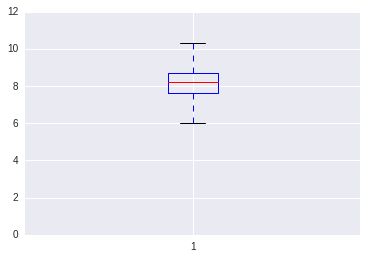

In [27]:
plt.boxplot([dataUnida.lnHouseIncome])

# Probando Modelos

In [ ]:
def runModel(dataset, income , variables):
    
    '''
    This function takes a data set, runs a model according to specifications,
    and returns the model, printing the summary
    '''
    selectedVariables = ['PONDERA',income] + variables
    dataToRun = dataset.loc[:,selectedVariables]
    y = dataToRun.copy().iloc[:,1].values
    X = sm.add_constant(dataToRun.copy().iloc[:,2:].values)
    w = dataToRun.copy().iloc[:,0].values
    lm = sm.WLS(y, X, weights=1. / w).fit()
    print lm.summary()
    for i in range(1,len(variables)+1):
        print 'x%d: %s' % (i,variables[i-1])
        
        
        
    y = dataUnida[ingreso].values)

    X = np.where(np.isnan(dataUnida.loc[:,variablesParaModelo].values),0,dataUnida.loc[:,variablesParaModelo].values)
    X = sm.add_constant(X)

    w = np.where(np.isnan(dataUnida.PONDERA.values),0,dataUnida.PONDERA.values)
    lm = sm.WLS(y, X, weights=1. / w).fit()
    print lm.summary()
    for i in range(1,len(variables)+1):
        print 'x%d: %s' % (i,variables[i-1])
    
    #testing within sample
    R_IS=[]
    R_OS=[]
    nCross=1000
    
    for i in range(nCross):
        X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y, w, test_size=0.33)
        lm = sm.WLS(y_train, X_train, weights=1. / w_train, hasconst=False).fit()        
        R_IS.append(1-((np.asarray(lm.predict(exog = X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
        R_OS.append(1-((np.asarray(lm.predict(exog = X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
    print("IS R-squared for {} times is {}".format(nCross,np.mean(R_IS)))
    print("OS R-squared for {} times is {}".format(nCross,np.mean(R_OS)))

    return lm

In [ ]:
ingreso = 'lnHouseIncome'
variablesParaModelo = [u'RoomsNumber', u'FloorMaterial', u'RoofMaterial',
       u'RoofCoat', u'Water', u'WaterType', u'Toilet', u'ToiletLocation',
       u'ToiletType', u'Sewer', u'DumpSites', u'Flooding', u'EmergencyLoc',
       u'UsableTotalRooms', u'SleepingRooms', u'OfficeRooms', u'OnlyWork',
       u'Kitchen', u'Sink', u'Garage', u'Ownership', u'CookingCombustible',
       u'BathroomUse', u'Working', u'HouseMembers', u'Memberless10',
       u'Membermore10', u'WaterRec', u'OwnershipRec',
       u'Hacinamiento', u'headAge', u'spouseAge',
       u'headAge2', u'spouseAge2', u'headFemale', u'spouseFemale', u'headEduc',
       u'spouseEduc', u'headEduc2', u'spouseEduc2', u'headPrimary',
       u'spousePrimary', u'headSecondary', u'spouseSecondary',
       u'headUniversity', u'spouseUniversity']



y = np.where(np.isnan(dataUnida[ingreso].values),0,dataUnida[ingreso].values)

X = np.where(np.isnan(dataUnida.loc[:,variablesParaModelo].values),0,dataUnida.loc[:,variablesParaModelo].values)
X = sm.add_constant(X)

w = np.where(np.isnan(dataUnida.PONDERA.values),0,dataUnida.PONDERA.values)
lm = sm.WLS(y, X, weights=1. / w).fit()
print lm.summary()
for i in range(1,len(variables)+1):
    print 'x%d: %s' % (i,variables[i-1])


# PCA

In [ ]:
from sklearn.decomposition import PCA

variablesParaModelo = ['FloorMaterial', 'RoofMaterial',
       'RoofCoat', 'Water', 'WaterType', 'Toilet', 'ToiletLocation',
       'ToiletType', 'Sewer','CookingCombustible',
       'BathroomUse','OwnershipRec']

X = np.where(np.isnan(dataUnida.loc[:,variablesParaModelo].values),0,dataUnida.loc[:,variablesParaModelo].values)

n = 12
pca = PCA(n)
Xproj = pca.fit_transform(X)


eigenvalues = pca.explained_variance_
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,3,1)

ax.bar(np.arange(n), eigenvalues);
ax.set_xlabel("Dimensionality")
ax.set_ylabel("Variance")


ratio = pca.explained_variance_ratio_
ax2 = fig.add_subplot(1,3,2)
ax2.bar(np.arange(n), ratio);
ax2.set_xlabel("Dimensionality")
ax2.set_ylabel("%of variance")

sumRatio = np.cumsum(pca.explained_variance_ratio_)
ax3 = fig.add_subplot(1,3,3)
ax3.bar(np.arange(n), sumRatio);
ax3.set_xlabel("Dimensionality")
ax3.set_ylabel("%Cumulative sum of variance")

In [ ]:
plt.scatter(Xproj[:, 0], Xproj[:, 1])

In [ ]:
dataUnida['HousePCA1'] = Xproj[:, 0]
dataUnida['HousePCA2'] = Xproj[:, 1]


# MODELO 2 - PCA para la vivienda y variables individuales del jefe y conyuge separdas

In [ ]:
ingreso = 'lnHouseIncome'
variablesParaModelo = ['HousePCA1', 'HousePCA2','Hacinamiento',
    'headAge', 'spouseAge',
       'headAge2', 'spouseAge2', 'headFemale', 'spouseFemale', 'headEduc',
       'spouseEduc', 'headEduc2', 'spouseEduc2'
                      ]



y = np.where(np.isnan(dataUnida[ingreso].values),0,dataUnida[ingreso].values)

X = np.where(np.isnan(dataUnida.loc[:,variablesParaModelo].values),0,dataUnida.loc[:,variablesParaModelo].values)
X = sm.add_constant(X)

w = np.where(np.isnan(dataUnida.PONDERA.values),0,dataUnida.PONDERA.values)

lm = sm.WLS(y, X, weights=1. / w).fit()
print lm.summary()
for i in range(1,len(variablesParaModelo)+1):
    print 'x%d: %s' % (i,variablesParaModelo[i-1])

# MODELO 3 - PCA para la vivienda y variables individuales del jefe y conyuge predecidas 

In [ ]:
ingreso = 'lnHouseIncome'
variablesParaModelo = ['HousePCA1', 'HousePCA2','Hacinamiento','headPredictedLnIncome','spousePredictedLnIncome']



y = np.where(np.isnan(dataUnida[ingreso].values),0,dataUnida[ingreso].values)

X = np.where(np.isnan(dataUnida.loc[:,variablesParaModelo].values),0,dataUnida.loc[:,variablesParaModelo].values)
X = sm.add_constant(X)

w = np.where(np.isnan(dataUnida.PONDERA.values),0,dataUnida.PONDERA.values)

lm = sm.WLS(y, X, weights=1. / w).fit()
print lm.summary()
for i in range(1,len(variablesParaModelo)+1):
    print 'x%d: %s' % (i,variablesParaModelo[i-1])

# Modelo 4 - PCA para la vivienda y variables individuales del jefe y conyuge sumadas

In [ ]:
ingreso = 'lnHouseIncome'
variablesParaModelo = ['HousePCA1', 'HousePCA2','sumPredicted']


y = np.where(np.isnan(dataUnida[ingreso].values),0,dataUnida[ingreso].values)

X = np.where(np.isnan(dataUnida.loc[:,variablesParaModelo].values),0,dataUnida.loc[:,variablesParaModelo].values)
X = sm.add_constant(X)

w = np.where(np.isnan(dataUnida.PONDERA.values),0,dataUnida.PONDERA.values)

lm = sm.WLS(y, X, weights=1. / w).fit()
print lm.summary()
for i in range(1,len(variablesParaModelo)+1):
    print 'x%d: %s' % (i,variablesParaModelo[i-1])

# Modelo 5 - solo con jefe

In [ ]:
ingreso = 'lnHouseIncome'
variablesParaModelo = ['HousePCA1', 'HousePCA2','headAge','headEduc']


y = np.where(np.isnan(dataUnida[ingreso].values),0,dataUnida[ingreso].values)

X = np.where(np.isnan(dataUnida.loc[:,variablesParaModelo].values),0,dataUnida.loc[:,variablesParaModelo].values)
X = sm.add_constant(X)

w = np.where(np.isnan(dataUnida.PONDERA.values),0,dataUnida.PONDERA.values)

lm = sm.WLS(y, X, weights=1. / w).fit()
print lm.summary()
for i in range(1,len(variablesParaModelo)+1):
    print 'x%d: %s' % (i,variablesParaModelo[i-1])

# pROBANDO COSAS

In [ ]:
ingreso = 'lnHouseIncome'
variablesParaModelo = ['HousePCA1', 'HousePCA2','Hacinamiento',
    'headAge', 'spouseAge',
       'headAge2', 'spouseAge2', 'headFemale', 'spouseFemale', 'headEduc',
       'spouseEduc', 'headEduc2', 'spouseEduc2'
                      ]



y = np.where(np.isnan(dataUnida[ingreso].values),0,dataUnida[ingreso].values)

X = np.where(np.isnan(dataUnida.loc[:,variablesParaModelo].values),0,dataUnida.loc[:,variablesParaModelo].values)
X = sm.add_constant(X)

w = np.where(np.isnan(dataUnida.PONDERA.values),0,dataUnida.PONDERA.values)

lm = sm.WLS(y, X, weights=1. / w).fit()
print lm.summary()
for i in range(1,len(variablesParaModelo)+1):
    print 'x%d: %s' % (i,variablesParaModelo[i-1])